# Bootstrap Intro

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

### Bootstrap Examples
Bootstrap at a high level:
The bootstrap lets you resample a numeric series to (typically) estimate confidence intervals.

[More info on the bootstrap](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf)

In [3]:
# little a/b test
# score in test are 10% greater than ctrl (per record)
# ctrl has 5x the number of records as test

# 10% lift in test
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000) * 1.0
ctrl = np.random.binomial(100, p=0.2, size=50000) * 1.0

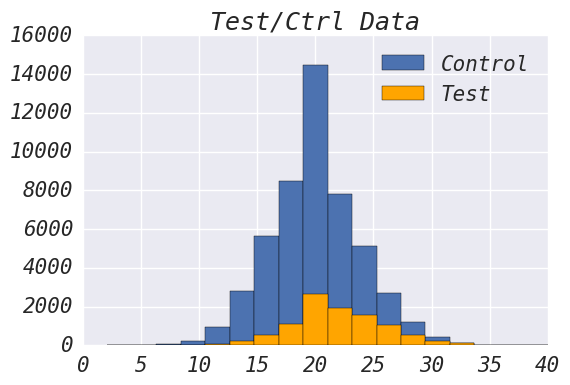

In [4]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='Control')
plt.hist(test, bins=bins, label='Test', color='orange')
plt.title('Test/Ctrl Data')
plt.legend()

In [5]:
# run an a/b test simulation ignoring the lengths of the series (average)
# just what is the 'typical' value
# use percent change to compare test and control

print(bs_compare.percent_change(test.mean(), ctrl.mean()))

print(bs.bootstrap_ab(test, ctrl, bs_stats.mean, bs_compare.percent_change))

9.98290198571
9.98290198571    (9.53991577277, 10.4249160258)


In [6]:
print(len(test))
print(len(ctrl))

10000
50000


In [7]:
# run an a/b test simulation considering the lengths of the series (sum)
# consider the full 'volume' of values that are passed in

print(bs_compare.percent_change(test.sum(), ctrl.sum()))

print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.percent_change
))

-78.0034196029
-78.0034196029    (-78.0918070091, -77.9145539966)


**Advice:** For most situations we reccomend that we use 'sum' aggregate function as this will take the size of the population into account. This can be useful if you think your test will increase the total number of individuals in the population and not only the typical value per individual. 

**Exception to the above advice**


There are situations where you might need to make some adjustments, for example if your holdouts are sized differently.

 * You give 100 dollars to **person_A** and you give 1000 dollars to **person_B** to bring people to your store
 * Say you don't know how many people person_A or person_B went after but they did each get paying customers to attend
 * However you do need to correct at the end for the fact that you gave person_B 10x more money than person_A

In [8]:
# Gave $100, got 1k events on the store, $20 per event 
person_A_results = np.random.binomial(100, p=0.2, size=1000) * 1.0

# Gave $1000, got 5k events on the store, $30 per event
person_B_results = np.random.binomial(100, p=0.3, size=5000) * 1.0

In [9]:
# The test earned much less in terms of total dollars
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.difference,
))

-130131.0    (-130809.025, -129437.0)


In [10]:
# The test gives ~$10 less per event
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.mean,
    compare_func=bs_compare.difference,
))

-9.9078    (-10.1834, -9.634595)


In [11]:
# If we scale the text by $$ spent - person_A should be a better return on investment
#  - assuming person_A can achieve similar results with 10x more money
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.difference,
    scale_test_by=10.,
))

51201.0    (48689.95, 53765.1)
